# Jared Rozowsky 
# Homework 2

In [1]:
import pandas as pd

# Load csv file
df = pd.read_csv('data.csv',header = 0)

df.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654,1
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674,1
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634,1
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975,1
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335,1


In [2]:
#split into data and labels
X = df.iloc[:,1:22].values
y = df.iloc[:,23].values

#Column0 = patient names
#Columns 1-22 = features
#Column 23 = classifier

## Split into training and testing data

In [3]:
from sklearn.model_selection import train_test_split

#holdout 20% of data for testing
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.20,stratify=y, random_state=1)

In [4]:
print("X_train shape: ", X_train.shape)
print("Y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_test shape: ", y_test.shape)

X_train shape:  (156, 21)
Y_train shape:  (156,)
X_test shape:  (39, 21)
Y_test shape:  (39,)


## Implement k-nearest neighbors

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

#knn = KNeighborsClassifier()
pipe_knn = make_pipeline(StandardScaler(), KNeighborsClassifier())

#test n_neighbors parameter
param_range = [4, 5, 6, 7, 8, 9, 10]

param_grid = {'kneighborsclassifier__n_neighbors': param_range}

gs = GridSearchCV(estimator=pipe_knn, param_grid=param_grid, cv=10, scoring='accuracy')

gs.fit(X_train, y_train)

print(gs.best_score_)
print(gs.best_params_)

0.9038461538461539
{'kneighborsclassifier__n_neighbors': 4}


### GridSearch indicated that n=4 gives the best results

In [6]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(gs, X_train, y_train, cv=10, scoring='accuracy')
print('CV accuracy: %.3f +/- %.3f' % (np.mean(scores),
                                      np.std(scores)))
#using optimized parameters, print the training accuracy with 10-fold cross validation

CV accuracy: 0.890 +/- 0.103


## Display learning curve

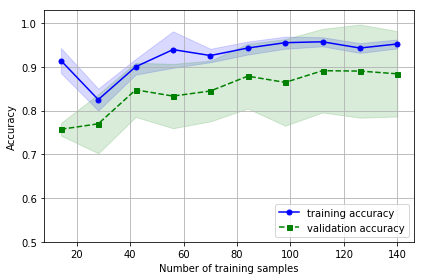

In [7]:
import matplotlib.pyplot as plt

# Plot data inline
%matplotlib inline

from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores =\
                learning_curve(estimator=pipe_knn,
                               X=X_train,
                               y=y_train,
                               train_sizes=np.linspace(0.1, 1.0, 10),
                               cv=10,
                               n_jobs=1)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(train_sizes, train_mean,
         color='blue', marker='o',
         markersize=5, label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean + train_std,
                 train_mean - train_std,
                 alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean,
         color='green', linestyle='--',
         marker='s', markersize=5,
         label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean + test_std,
                 test_mean - test_std,
                 alpha=0.15, color='green')

plt.grid()
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim([0.5, 1.03])
plt.tight_layout()
plt.show()

### The learning curve indicates there is good bias-variance tradeoff

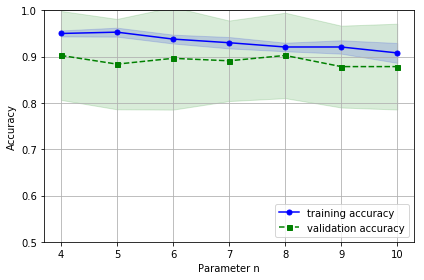

In [8]:
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
                estimator=pipe_knn, 
                X=X_train, 
                y=y_train, 
                param_name='kneighborsclassifier__n_neighbors', 
                param_range=param_range,
                cv=10)

train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

plt.plot(param_range, train_mean, 
         color='blue', marker='o', 
         markersize=5, label='training accuracy')

plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, alpha=0.15,
                 color='blue')

plt.plot(param_range, test_mean, 
         color='green', linestyle='--', 
         marker='s', markersize=5, 
         label='validation accuracy')

plt.fill_between(param_range, 
                 test_mean + test_std,
                 test_mean - test_std, 
                 alpha=0.15, color='green')
plt.grid()
plt.xscale('linear')
plt.legend(loc='lower right')
plt.xlabel('Parameter n')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.0])
plt.tight_layout()
plt.show()

### Training accuracy decreases slightly as n increases, although validation accuracy looks relatively constant


## 
## 
## Run model on testing data

In [9]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print('Test accuracy: %.2f' % clf.score(X_test, y_test))

Test accuracy: 0.87
